# Taxa de Alfabetização em Portugal
### Trabalho de Grupo

Docente: João Orvalho

Discentes: 
Ana Tavares a2020126703  
Beatriz Ferreira a2020126731  
Beatriz Pastor a2020131234   
Eva Costa a2020145290

#### Proposta de Trabalho:
Para este trabalho, em grupo decidimos avaliar a taxa de alfabetização em Portugal no ano de 1900 e comparar com 1911.
A razão pela qual escolhemos este tema para o gtrabalho foi pelo simples facto de estarmos na altura dos Censos e termos ficado curiosas como eram os resultados antigamente.

## Taxa de alfabetização em Portugal no ano de 1900

In [1]:
import pandas as pd              #importar os pandas como pd
import matplotlib.pyplot as plt  #importar o matplotlib.pyplot para os gráficos como plt
import numpy as np               #importar os numpys como np

df_first = pd.read_csv("Censos_1900.csv")    #ler o primeiro conjunto de dados através dos pandas
df_first

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
0,Aveiro,303169,29.9%,15.5%,48.9%,5.7%,78.8%,21.2%
1,Beja,163612,41.5%,9.2%,43.7%,5.7%,85.2%,14.8%
2,Braga,357159,29.6%,15.6%,48.2%,6.6%,77.8%,22.2%
3,Bragança,185162,37.8%,11.8%,45.6%,4.8%,83.4%,16.6%
4,Castelo Branco,216608,39.1%,9.7%,47.4%,3.8%,86.5%,13.5%
5,Coimbra,332168,32.9%,12.9%,50.2%,4.0%,83.1%,16.9%
6,Évora,128062,40.8%,10.5%,41.5%,7.2%,82.3%,17.7%
7,Faro,255191,41.3%,8.6%,42.1%,8.0%,83.4%,16.6%
8,Guarda,261630,36.0%,11.9%,47.7%,4.5%,83.7%,16.3%
9,Leiria,238755,39.0%,9.7%,47.5%,3.8%,86.5%,13.5%


#### Qual o valor máximo e mínimo de pessoas analfabetas em Portugal no ano de 1900?

In [2]:
max_analfabetos = df_first.Total_Analfabetos.max() #calcular o valor máximo da coluna Total_Analfabetos
min_analfabetos = df_first.Total_Analfabetos.min() #calcular o valor minímo da coluna Total_Analfabetos

max_analfabetos,min_analfabetos

('90.0%', '62.6%')

#### Qual é o distrito com mais pessoas analfabetas?

In [3]:
#ordenar os dados por ordem descendente a partir de uma coluna para ver qual o distrito com mais analfabetos

df_first.sort_values(by=['Total_Analfabetos'], ascending=False).head(1) 


#sort_values é uma função que ordena por defeito os dados por ordem ascendente através de uma coluna
#ascending=False faz com que a função ordene por ordem descendente
    
#.head(1) = mostra apenas a primeira linha, ou seja, o distrito com mais pessoas analfabetas

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
20,Funchal,150574,43.3%,4.8%,46.8%,5.1%,90.0%,10.0%


#### Qual é o distrito com menos pessoas analfabetas?

In [4]:
#ordenar os dados por ordem ascendente a partir de uma coluna para ver qual o distrito com menos analfabetos 
df_first.sort_values(by=['Total_Analfabetos']).head(1)

#sem o ascending=False a função ordena por defeitos os valores de forma ascendente, o que também aconteceria se colocássemos ascending=True

#.head(1) = mostra apenas a primeira linha, ou seja, o distrito com menos pessoas analfabetas

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
10,Lisboa,709509,30.6%,20.2%,32.0%,17.3%,62.6%,37.4%


#### Como os valores com percentagem são considerados objetos neste conjunto de dados, para prosseguirmos é necessário transformá-los em floats para analisá-los mais detalhadamente.

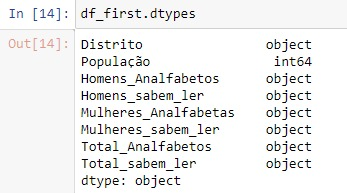

In [5]:
def f(x):                                    #função para transformar todas as percentagens em floats
    if type(x) == str:                       #para cada valor que for uma string então...
        if "%" in x:                         # se existir o símbolo % no valor que está a ser analisado
            return float(x.replace("%", "")) #retirar o símbolo de percentagem para assim deixar de ser um objeto e tornar se num float
            
        else:
            return x
    else:
        return x                             #devolve o valor analisado agora como float

#a função não vai alterar os valores de percentagem apenas vai tirar o símbolo "%"
    
#aplicar a função nas colunas que têm valores de percentagem
df_first["Homens_Analfabetos"]=df_first["Homens_Analfabetos"].apply(f)
df_first["Homens_sabem_ler"]=df_first["Homens_sabem_ler"].apply(f)
df_first["Mulheres_Analfabetas"]=df_first["Mulheres_Analfabetas"].apply(f)
df_first["Mulheres_sabem_ler"]=df_first["Mulheres_sabem_ler"].apply(f)
df_first["Total_Analfabetos"]=df_first["Total_Analfabetos"].apply(f)
df_first["Total_sabem_ler"]=df_first["Total_sabem_ler"].apply(f)

df_first

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
0,Aveiro,303169,29.9,15.5,48.9,5.7,78.8,21.2
1,Beja,163612,41.5,9.2,43.7,5.7,85.2,14.8
2,Braga,357159,29.6,15.6,48.2,6.6,77.8,22.2
3,Bragança,185162,37.8,11.8,45.6,4.8,83.4,16.6
4,Castelo Branco,216608,39.1,9.7,47.4,3.8,86.5,13.5
5,Coimbra,332168,32.9,12.9,50.2,4.0,83.1,16.9
6,Évora,128062,40.8,10.5,41.5,7.2,82.3,17.7
7,Faro,255191,41.3,8.6,42.1,8.0,83.4,16.6
8,Guarda,261630,36.0,11.9,47.7,4.5,83.7,16.3
9,Leiria,238755,39.0,9.7,47.5,3.8,86.5,13.5


#### Agora vamos comparar se existem mais mulheres ou homens que sabem ler em Portugal no ano de 1900.
 Antes de começarmos vamos primeiro determinar qual a maior e menor percentagem de mulheres e homens que sabem ler, para assim conseguirmos trabalhar da melhor forma possível com as dimensões dos gráficos

In [6]:
max_ler_Homens = df_first.Homens_sabem_ler.max() #valor máximo da coluna Homens_sabem_ler
min_ler_Homens = df_first.Homens_sabem_ler.min() #valor mínimo da coluna Homens_sabem_ler

max_ler_Mulheres = df_first.Mulheres_sabem_ler.max() #valor máximo da coluna Mulheres_sabem_ler
min_ler_Mulheres = df_first.Mulheres_sabem_ler.min() #valor mínimo da coluna Mulheres_sabem_ler

print("Máximo dos Homens que sabem ler =",max_ler_Homens,"%;  Mínimo =", min_ler_Homens,"%;  Máximo de Mulheres que sabem ler =", max_ler_Mulheres, "%;  Mínimo =",min_ler_Mulheres,"%;")

Máximo dos Homens que sabem ler = 20.2 %;  Mínimo = 4.8 %;  Máximo de Mulheres que sabem ler = 17.3 %;  Mínimo = 3.7 %;


#### Homens

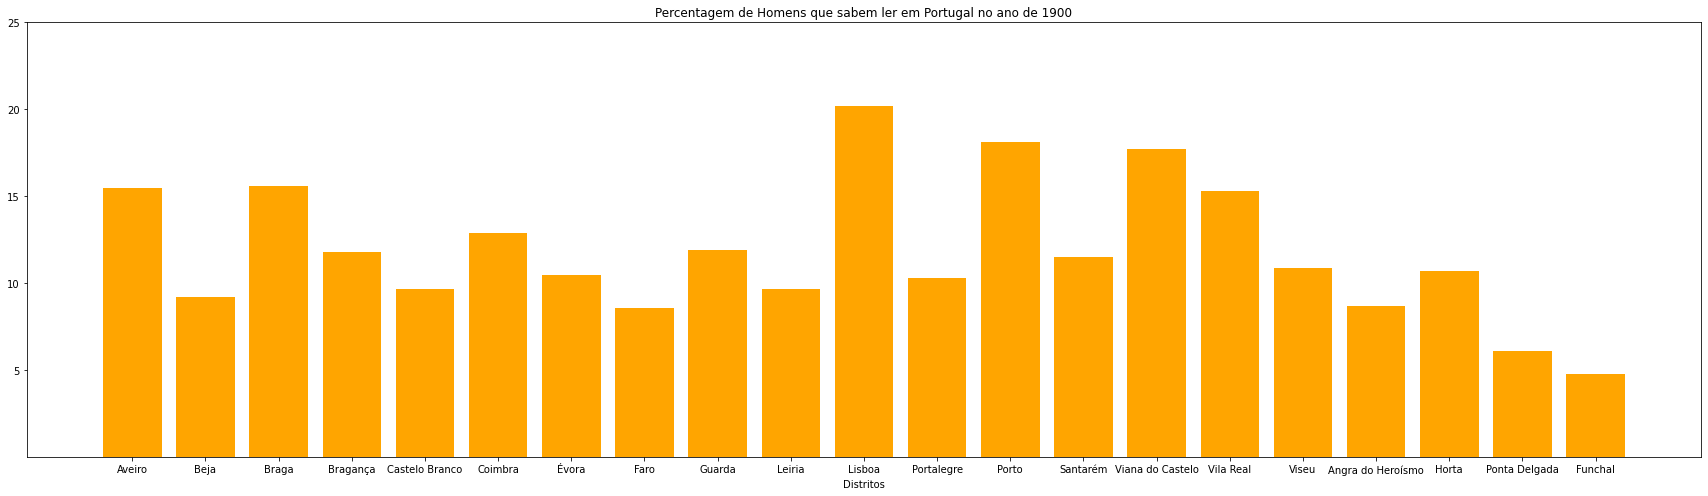

In [7]:
%matplotlib inline 
#importar da biblioteca dados de gráficos

#dados para o gráfico
distritos = df_first ['Distrito'].tolist() #transformar os valores da coluna Distrito em uma lista numa única variável
homens = df_first ['Homens_sabem_ler'].tolist() #transformar os valores da coluna Homens_sabem_ler em uma lista numa única variável

#definições do gráfico
plt.bar(distritos, homens, color="orange") #criar um gráfico de barras laranja com os dados das colunas Distrito(x) e Homens_sabem_ler(y)
plt.gcf().set_size_inches(30, 8) #função para trabalhar as dimensões do gráfico
#plt.figure(figsize = (20, 12)) outra forma menos eficaz de trabalhar as dimensões do gráfico

#estilização do gráfico
plt.xlabel("Distritos") #título do eixo do x (linha horizontal)
plt.title("Percentagem de Homens que sabem ler em Portugal no ano de 1900") #título do gráfico
plt.xticks(distritos) #valores do eixo do x (todos os valores da coluna Distritos)
plt.yticks([5,10,15,20,25]) #escala para os valores do eixo y (linha vertical)
plt.show() #mostrar o gráfico de barras

#### Mulheres

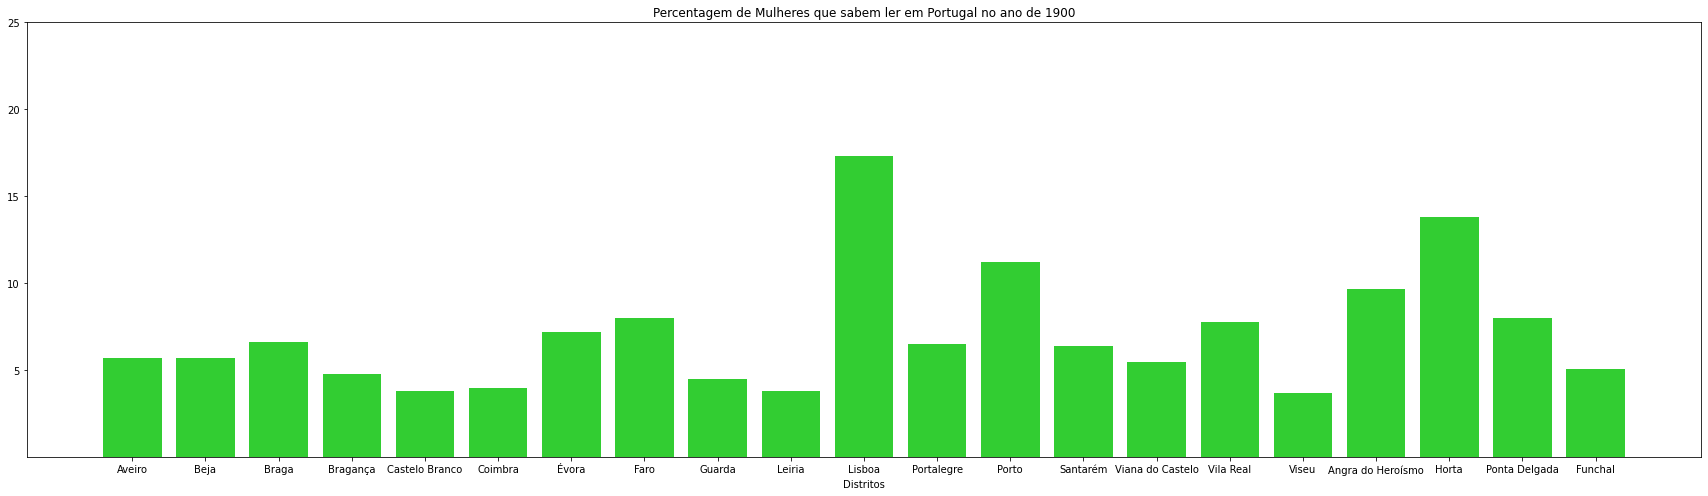

In [8]:
%matplotlib inline 
#importar da biblioteca dados de gráficos

#dados para o gráfico
distritos=df_first ['Distrito'].tolist() #transformar os valores da coluna Distrito em uma lista numa única variável
mulheres=df_first ['Mulheres_sabem_ler'].tolist() #transformar os valores da coluna Mulheres_sabem_ler em uma lista numa única variável

#definições do gráfico
plt.bar(distritos, mulheres, color="limegreen") #criar um gráfico de barras verde com os dados das colunas Distrito(x) e Mulheres_sabem_ler(y)
plt.gcf().set_size_inches(30,8) #função para trabalhar as dimensões do gráfico
           
#estilização do gráfico
plt.xlabel("Distritos") #título do eixo do x (linha horizontal)
plt.title("Percentagem de Mulheres que sabem ler em Portugal no ano de 1900") #título do gráfico
plt.xticks(distritos) #valores do eixo do x (todos os valores da coluna Distritos)
plt.yticks([5,10,15,20,25]) #escala para os valores do eixo y (linha vertical)
plt.show() #mostrar o gráfico de barras

Com isto podemos concluir que, em 1900, os homens tinham muitas mais opurtunidades de aprender a ler do que as mulheres, principalmente os que viviam nas grandes cidades.

#### Por fim vamos calcular algumas médias importantes para compararmos com o próximo conjunto de dados.

In [9]:
media_analfabetos = df_first.Total_Analfabetos.mean() #média de todos os valores da coluna Total_Alfabetos
media_ler = df_first.Total_sabem_ler.mean() #média de todos os valores da coluna Total_sabem_ler

media_analfabetos=round(media_analfabetos,2) #arredondar o resultado para 2 casas decimais
media_ler=round(media_ler,2) #arredondar o resultado para 2 casas decimais

print("Em Portugal, no ano de 1900 existia em média", media_ler, "% de pessoas que sabiam ler e", media_analfabetos, "% de pessoas que eram analfabetas.")

Em Portugal, no ano de 1900 existia em média 18.99 % de pessoas que sabiam ler e 81.01 % de pessoas que eram analfabetas.


## Taxa de alfabetização em Portugal no ano de 1911

In [10]:
df_second = pd.read_csv("Censos_1911.csv") #ler o segundo conjunto de dados através dos pandas
df_second

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
0,Aveiro,336243,28.2%,16.9%,46.7%,8.2%,75.0%,25.0%
1,Beja,192499,41.3%,9.6%,42.6%,6.4%,83.9%,16.1%
2,Braga,382276,29.4%,16.2%,46.5%,7.9%,76.0%,24.0%
3,Bragança,192024,37.2%,12.1%,44.5%,6.2%,81.7%,18.3%
4,Castelo Branco,241184,37.9%,10.8%,46.5%,4.8%,84.4%,15.6%
5,Coimbra,359387,30.3%,15.0%,48.7%,6.0%,79.1%,20.9%
6,Évora,148295,39.3%,11.6%,40.9%,8.2%,80.2%,19.8%
7,Faro,272861,40.1%,8.7%,42.0%,9.2%,82.1%,17.9%
8,Guarda,271616,33.9%,13.2%,46.3%,6.6%,80.2%,19.8%
9,Leiria,262632,36.5%,11.5%,46.9%,5.1%,83.4%,16.6%


#### Qual o valor máximo e mínimo de pessoas analfabetas em Portugal no ano de 1911? Será que houve alguma alteração após 11 anos?

In [11]:
max_analfabetos = df_second.Total_Analfabetos.max() #calcular o valor máximo da coluna Total_Analfabetos do segundo conjunto de dados
min_analfabetos = df_second.Total_Analfabetos.min()  #calcular o valor minímo da coluna Total_Analfabetos

max_analfabetos, min_analfabetos

('84.4%', '59.8%')

#### Será que o distrito com mais pessoas analfabetas mudou?

In [12]:
#ordenar os dados por ordem descendente a partir de uma coluna para ver qual o distrito com mais analfabetos
df_second.sort_values(by=['Total_Analfabetos'], ascending=False).head(1)

#assim como no primeiro conjunto de daods, sort_values é uma função que ordena por defeito os dados por ordem ascendente através de uma coluna
#ascending=False faz com que a função ordene por ordem descendente
    
#.head(1) = mostra apenas a primeira linha, ou seja, o distrito com mais pessoas analfabetas do segundo conjunto de dados

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
4,Castelo Branco,241184,37.9%,10.8%,46.5%,4.8%,84.4%,15.6%


#### E o distrito com menos pessoas analfabetas?

In [13]:
#ordenar os dados por ordem ascendente a partir de uma coluna para ver qual o distrito com menos analfabetos 
df_second.sort_values(by=['Total_Analfabetos']).head(1)

#sem o ascending=False a função ordena por defeitos os valores de forma ascendente, o que também aconteceria se colocássemos ascending=True

#.head(1) = mostra apenas a primeira linha, ou seja, o distrito com menos pessoas analfabetas do segundo conjunto de dados

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
10,Lisboa,852354,28.7%,21.5%,31.1%,18.7%,59.8%,40.2%


#### Como aconteceu com o outro conjunto de dados, aqui também é necessário transformar os valores de percentagem em floats:

In [14]:
#aplicar a função para transformar todas as percentagens em floats nas colunas que têm valores de percentagem no novo dataframe
df_second["Homens_Analfabetos"]=df_second["Homens_Analfabetos"].apply(f)
df_second["Homens_sabem_ler"]=df_second["Homens_sabem_ler"].apply(f)
df_second["Mulheres_Analfabetas"]=df_second["Mulheres_Analfabetas"].apply(f)
df_second["Mulheres_sabem_ler"]=df_second["Mulheres_sabem_ler"].apply(f)
df_second["Total_Analfabetos"]=df_second["Total_Analfabetos"].apply(f)
df_second["Total_sabem_ler"]=df_second["Total_sabem_ler"].apply(f)

#a função não vai alterar os valores de percentagem apenas vai tirar o símbolo "%"

df_second

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
0,Aveiro,336243,28.2,16.9,46.7,8.2,75.0,25.0
1,Beja,192499,41.3,9.6,42.6,6.4,83.9,16.1
2,Braga,382276,29.4,16.2,46.5,7.9,76.0,24.0
3,Bragança,192024,37.2,12.1,44.5,6.2,81.7,18.3
4,Castelo Branco,241184,37.9,10.8,46.5,4.8,84.4,15.6
5,Coimbra,359387,30.3,15.0,48.7,6.0,79.1,20.9
6,Évora,148295,39.3,11.6,40.9,8.2,80.2,19.8
7,Faro,272861,40.1,8.7,42.0,9.2,82.1,17.9
8,Guarda,271616,33.9,13.2,46.3,6.6,80.2,19.8
9,Leiria,262632,36.5,11.5,46.9,5.1,83.4,16.6


#### Agora vamos comparar se existem mais mulheres ou homens que sabem ler em Portugal no ano de 1911.

   Assim como no outro data frame, vamos primeiramente determinar qual a maior e menor percentagem de mulheres e homens que sabem ler, para conseguirmos trabalhar da melhor forma possível com as dimensões dos gráficos.


In [15]:
max_ler_Homens = df_second.Homens_sabem_ler.max() #valor máximo da coluna Homens_sabem_ler no segundo conjunto de dados
min_ler_Homens = df_second.Homens_sabem_ler.min() #valor mínimo da coluna Homens_sabem_ler no segundo conjunto de dados

max_ler_Mulheres = df_second.Mulheres_sabem_ler.max() #valor máximo da coluna Mulheres_sabem_ler no segundo conjunto de dados
min_ler_Mulheres = df_second.Mulheres_sabem_ler.min() #valor mínimo da coluna Mulheres_sabem_ler no segundo conjunto de dados

print("Máximo dos Homens que sabem ler =",max_ler_Homens,"%;  Mínimo =", min_ler_Homens,"%;  Máximo de Mulheres que sabem ler =", max_ler_Mulheres, "%;  Mínimo =",min_ler_Mulheres,"%;")

Máximo dos Homens que sabem ler = 21.5 %;  Mínimo = 7.5 %;  Máximo de Mulheres que sabem ler = 21.6 %;  Mínimo = 4.8 %;


#### Homens

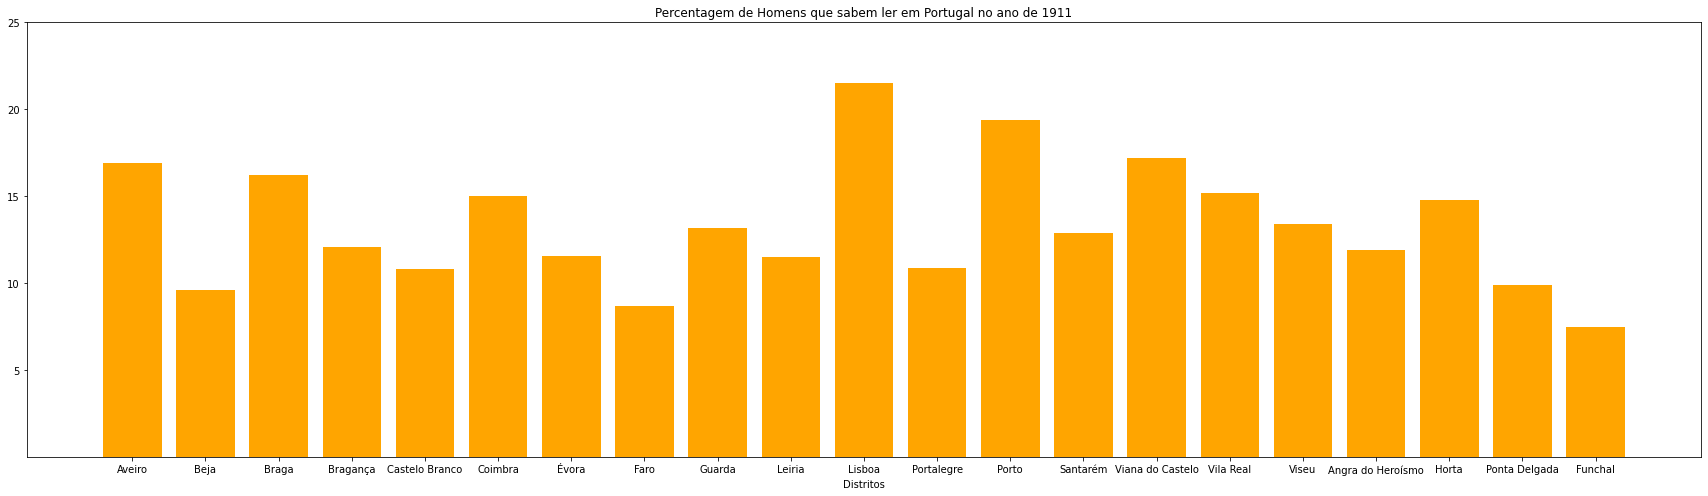

In [16]:
%matplotlib inline 
#importar da biblioteca dados de gráficos

#dados para o gráfico
distritos = df_second ['Distrito'].tolist() #transformar os valores da coluna Distrito do segundo data frame em uma lista numa única variável
homens = df_second ['Homens_sabem_ler'].tolist() #transformar os valores da coluna Homens_sabem_ler do segundo data frame em uma lista numa única variável

#definições do gráfico
plt.bar(distritos, homens, color="orange") #criar um gráfico de barras laranja com os dados das colunas Distrito(x) e Homens_sabem_ler(y) do segundo conjunto de dados
plt.gcf().set_size_inches(30, 8) #função para trabalhar as dimensões do gráfico

#estilização do gráfico
plt.xlabel("Distritos") #título do eixo do x (linha horizontal)
plt.title("Percentagem de Homens que sabem ler em Portugal no ano de 1911") #título do gráfico
plt.xticks(distritos) #valores do eixo do x (todos os valores da coluna Distritos do segundo conjunto de dados)
plt.yticks([5,10,15,20,25]) #escala para os valores do eixo y (linha vertical)
plt.show() #mostrar o gráfico de barras

#### Mulheres

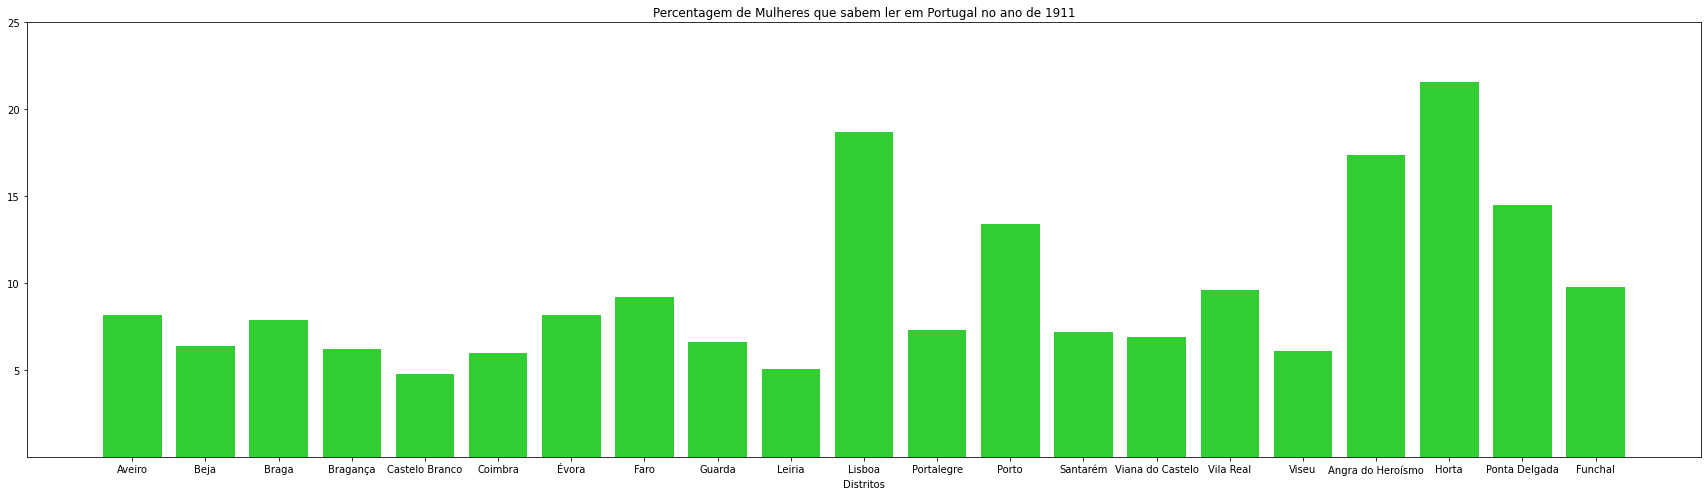

In [17]:
%matplotlib inline 
#importar da biblioteca dados de gráficos

#dados para o gráfico
distritos=df_second['Distrito'].tolist() #transformar os valores da coluna Distrito do segundo data frame em uma lista numa única variável
mulheres=df_second['Mulheres_sabem_ler'].tolist() #transformar os valores da coluna Mulheres_sabem_ler do segundo data frame em uma lista numa única variável

#definições do gráfico
plt.bar(distritos, mulheres, color="limegreen") #criar um gráfico de barras verde com os dados das colunas Distrito(x) e Mulheres_sabem_ler(y) do segundo conjunto de dados
plt.gcf().set_size_inches(30, 8) #função para trabalhar as dimensões do gráfico

#estilização do gráfico
plt.xlabel("Distritos") #título do eixo do x (linha horizontal)
plt.title("Percentagem de Mulheres que sabem ler em Portugal no ano de 1911") #título do gráfico
plt.xticks(distritos) #valores do eixo do x (todos os valores da coluna Distritos do segundo conjunto de dados)
plt.yticks([5,10,15,20,25]) #escala para os valores do eixo y (linha vertical)
plt.show ()#mostrar o gráfico de barras

Neste caso pudemos ver que em alguns distritos houve uma evolução no que toca as mulheres pois, passado 11 anos, a percentagem de mulheres analfabetas desceu consideravelmente. 

#### Para terminar vamos calcular novamente algumas médias importantes para iniciarmos a próxima fase.

In [18]:
media_analfabetos2 = df_second.Total_Analfabetos.mean() #média de todos os valores da coluna Total_Alfabetos do segundo data frame
media_ler2 = df_second.Total_sabem_ler.mean() #média de todos os valores da coluna Total_sabem_ler do segundo data frame

media_analfabetos2=round(media_analfabetos,2) #arredondar para 2 casas decimais
media_ler2=round(media_ler,2) #arredondar para 2 casas decimais

print("Em Portugal, no ano de 1911 existia em média", media_ler2,"% de pessoas que sabiam ler e", media_analfabetos2,"% de pessoas que eram analfabetas.")

Em Portugal, no ano de 1911 existia em média 18.99 % de pessoas que sabiam ler e 81.01 % de pessoas que eram analfabetas.


## Comparação entre a Taxa de Analfabetismo de 1900 e 1911

#### Sabemos que em 1900, o distrito que tinha a maior percentagem de pessoas analfabetas era o Funchal, mas em 1911 isso mudou.

In [19]:
#ordenar os dados do primeiro data frame por ordem descendente a partir de uma coluna para ver qual o distrito com mais analfabetos 
df_first.sort_values(by=['Total_Analfabetos'], ascending=False).head()

#de novo, a função sort_values é uma função que ordena por defeito os dados por ordem ascendente através de uma coluna
#ascending=False faz com que a função ordene por ordem descendente
    
#.head(1) = mostra apenas a primeira linha do primeiro conjunto de dados, ou seja, o distrito com mais pessoas analfabetas

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
20,Funchal,150574,43.3,4.8,46.8,5.1,90.0,10.0
4,Castelo Branco,216608,39.1,9.7,47.4,3.8,86.5,13.5
9,Leiria,238755,39.0,9.7,47.5,3.8,86.5,13.5
19,Ponta Delgada,127726,40.4,6.1,45.4,8.0,85.9,14.1
16,Viseu,402259,35.2,10.9,50.2,3.7,85.4,14.6


In [20]:
#ordenar os dados do segundo data frame por ordem descendente a partir de uma coluna para ver qual o distrito com mais analfabetos 
df_second.sort_values(by=['Total_Analfabetos'], ascending=False).head()

#e mais uma vez, a função sort_values é uma função que ordena por defeito os dados por ordem ascendente através de uma coluna
#ascending=False faz com que a função ordene por ordem descendente
    
#.head(1) = mostra apenas a primeira linha do segundo conjunto de dados, ou seja, o distrito com mais pessoas analfabetas

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
4,Castelo Branco,241184,37.9,10.8,46.5,4.8,84.4,15.6
1,Beja,192499,41.3,9.6,42.6,6.4,83.9,16.1
9,Leiria,262632,36.5,11.5,46.9,5.1,83.4,16.6
20,Funchal,169783,40.0,7.5,42.7,9.8,82.8,17.2
7,Faro,272861,40.1,8.7,42.0,9.2,82.1,17.9


Podemos ver que passado 11 anos houve uma evolução e a percentagem de pessoas analfabetas desceu.
Apesar de existir progressos em certos distritos e eles terem deixado de ser o foco principal, houveram outros que tomaram os seus lugares, como o caso de Beja que antes nem era um dos 5 distritos com mais pessoas analfabetas e passados 11 anos passou a ser o segundo distrito com a maior percentagem.

#### A nível do distrito com a maior percentagem de pessoas que sabem ler, sabemos que em 1900 era Lisboa, a grande capital, mas será que isso se manteve passado 11 anos?

In [21]:
#ordenar os dados do primeiro data frame por ordem ascendente a partir de uma coluna para ver qual o distrito com menos analfabetos 
df_first.sort_values(by=['Total_Analfabetos']).head()

#sem o ascending=False na função sort_values, ela ordena por defeitos os valores de forma ascendente, o que também aconteceria se colocássemos ascending=True

#.head(1) = mostra apenas a primeira linha, ou seja, o distrito com menos pessoas analfabetas

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
10,Lisboa,709509,30.6,20.2,32.0,17.3,62.6,37.4
12,Porto,597935,28.3,18.1,42.3,11.2,70.6,29.4
18,Horta,55233,33.3,10.7,42.2,13.8,75.4,24.6
14,Viana do Castelo,215267,26.1,17.7,50.7,5.5,76.8,23.2
15,Vila Real,242196,32.6,15.3,44.2,7.8,76.9,23.1


In [22]:
#ordenar os dados do segundo data frame por ordem ascendente a partir de uma coluna para ver qual o distrito com menos analfabetos 
df_second.sort_values(by=['Total_Analfabetos']).head()

#sem o ascending=False na função sort_values, ela ordena por defeitos os valores de forma ascendente, o que também aconteceria se colocássemos ascending=True

#.head(1) = mostra apenas a primeira linha, ou seja, o distrito com menos pessoas analfabetas

,Distrito,População,Homens_Analfabetos,Homens_sabem_ler,Mulheres_Analfabetas,Mulheres_sabem_ler,Total_Analfabetos,Total_sabem_ler
10,Lisboa,852354,28.7,21.5,31.1,18.7,59.8,40.2
18,Horta,50055,29.5,14.8,34.1,21.6,63.6,36.4
12,Porto,679540,26.8,19.4,40.4,13.4,67.1,32.9
17,Angra do Heroísmo,69957,33.7,11.9,37.0,17.4,70.7,29.3
0,Aveiro,336243,28.2,16.9,46.7,8.2,75.0,25.0


Com estes resultados, podemos concluir que passados 11 anos, Lisboa continua a dar mais possibilidades às pessoas de aprenderem a ler, seguindo-se de outros grandes distritos como Horta e Porto.
A verdade é que naquele tempo, era nas cidades que as pessoas tinham maiores opurtunidades de aprender enquanto que no campo, grande parte da população acabava o 4º ano de escolaridade e ia trabalhar para as terras.

#### No que diz respeito à taxa de alfabetismo por gênero, será que melhorou em 1911?

#### 1900

In [23]:
#calculo da média que dos Homens e Mulheres Analfabetas em 1900

media_analfabetos_mulheres_1900 = df_first.Mulheres_Analfabetas.mean() #valor médio da coluna Mulheres_Analfabetas no primeiro conjunto de dados
media_analfabetos_homens_1900 = df_first.Homens_Analfabetos.mean() #valor médio da coluna Homens_Analfabetos no primeiro conjunto de dados
media_sabem_ler_mulheres_1900 = df_first.Mulheres_sabem_ler.mean () #valor médio da coluna Mulheres_sabem_ler no primeiro conjunto de dados
media_sabem_ler_homens_1900 = df_first.Homens_sabem_ler.mean() #valor médio da coluna Homens_sabem_ler no primeiro conjunto de dados

media_analfabetos_mulheres_1900 = round(media_analfabetos_mulheres_1900,2) #arredondar para 2 casas decimais
media_analfabetos_homens_1900 = round (media_analfabetos_homens_1900,2) #arredondar para 2 casas decimais
media_sabem_ler_mulheres_1900 = round (media_sabem_ler_mulheres_1900,2) #arredondar para 2 casas decimais
media_sabem_ler_homens_1900 = round (media_sabem_ler_homens_1900,2) #arredondar para 2 casas decimais


print("Em média, no ano de 1900 existiam",media_sabem_ler_mulheres_1900, "% de mulheres que sabiam ler",media_sabem_ler_homens_1900,"% de homens que sabiam ler. No entanto,",media_analfabetos_mulheres_1900, "% de mulheres são analfabetas e", media_analfabetos_homens_1900, "% de homens são analfabetos.")

Em média, no ano de 1900 existiam 7.1 % de mulheres que sabiam ler 11.89 % de homens que sabiam ler. No entanto, 45.2 % de mulheres são analfabetas e 35.82 % de homens são analfabetos.


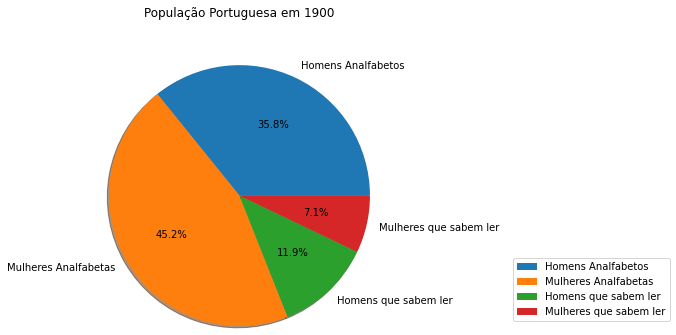

In [24]:
%matplotlib inline
#importar da biblioteca dados de gráficos


#dados do gráfico
labels = ['Homens Analfabetos', 'Mulheres Analfabetas', 'Homens que sabem ler', 'Mulheres que sabem ler'] #dar nome as legendas do gráfico
Medias = [media_analfabetos_homens_1900, media_analfabetos_mulheres_1900, media_sabem_ler_homens_1900, media_sabem_ler_mulheres_1900] #definir quais os dados a serem colocados relativos ao
#primeiro data frame


plt.axis("equal") #define uma escala igual

plt.pie(Medias, labels=labels, autopct='%1.1f%%',shadow=True, radius =1.5)#criar um gráfico "pizza" com os 
#dados das Médias calculadas. Labels foram estabelecidas - Homens e Mulheres. Autopct dá um rótulo a cada uma das fatias com 
#o seu respetivo número.shadow cria uma sombra no gráfico, por defeito shadow = False. Radius é o raio do gráfico que por defeito é 1.

plt.legend(loc='lower right', bbox_to_anchor=(1.8,-0.1))#plt.legend coloca a legenda do gráfico no sítio escolhido. 
#loc='upper left' = localização mias precisa da legenda - canto inferior direito, bbox_to_anchor=(1.8,-0.1) = permite dar liberdade no 
#posicionamento da caixa de legenda.

plt.title('População Portuguesa em 1900', pad= 70)#plt.title = (título do gráfico, deslocamento do título da parte 
#superior dos eixos, neste caso subiu 70 pontos)

plt.show() #mostrar o gráfico de barras

#### 1911

In [25]:
media_analfabetos_mulheres_1911 = df_second.Mulheres_Analfabetas.mean() #valor médio da coluna Mulheres_Analfabetas no segundo conjunto de dados
media_analfabetos_homens_1911 = df_second.Homens_Analfabetos.mean() #valor médio da coluna Homens_Analfabetos no segundo conjunto de dados
media_sabem_ler_mulheres_1911 = df_second.Mulheres_sabem_ler.mean () #valor médio da coluna Mulheres_sabem_ler no segundo conjunto de dados
media_sabem_ler_homens_1911 = df_second.Homens_sabem_ler.mean() #valor médio da coluna Homens_sabem_ler no segundo conjunto de dados


media_analfabetos_mulheres_1911 =round(media_analfabetos_mulheres_1911,2) #arredondar para 2 casas decimais
media_analfabetos_homens_1911 =round (media_analfabetos_homens_1911,2) #arredondar para 2 casas decimais
media_sabem_ler_mulheres_1911 = round (media_sabem_ler_mulheres_1911,2) #arredondar para 2 casas decimais
media_sabem_ler_homens_1911 = round (media_sabem_ler_homens_1911,2) #arredondar para 2 casas decimais


print("Em média, no ano de 1911 existiam",media_sabem_ler_mulheres_1911, "% de mulheres que sabiam ler",media_sabem_ler_homens_1911,"% de homens que sabiam ler. No entanto,",media_analfabetos_mulheres_1911, "% de   mulheres são analfabetas e", media_analfabetos_homens_1911, "% de homens são analfabetos.")

Em média, no ano de 1911 existiam 9.58 % de mulheres que sabiam ler 13.34 % de homens que sabiam ler. No entanto, 43.05 % de   mulheres são analfabetas e 34.02 % de homens são analfabetos.


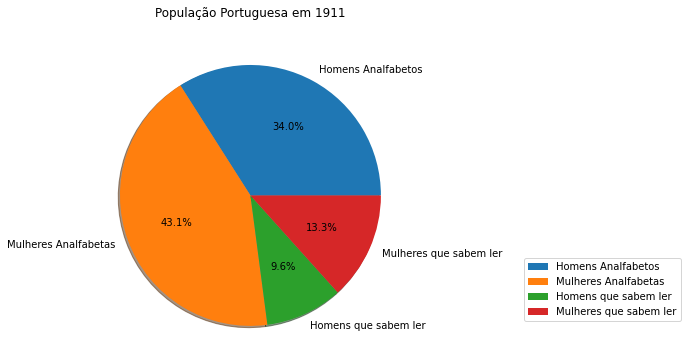

In [26]:
%matplotlib inline
#importar da biblioteca dados de gráficos


#dados do gráfico
labels = ['Homens Analfabetos', 'Mulheres Analfabetas', 'Homens que sabem ler', 'Mulheres que sabem ler'] #dar nome as legendas do gráfico
Medias = [media_analfabetos_homens_1911, media_analfabetos_mulheres_1911, media_sabem_ler_mulheres_1911,media_sabem_ler_homens_1911] #definir quais os dados a serem colocados relativos ao
#segundo data frame


plt.axis("equal") #define uma escala igual
   
plt.pie(Medias, labels=labels, autopct='%1.1f%%',shadow=True, radius=1.5)    #criar um gráfico "pizza" com os 
#dados das Médias calculadas. Labels foram estabelecidas - Homens e Mulheres. Autopct dá um rótulo a cada uma das fatias com 
#o seu respetivo número. Shadow cria uma sombra no gráfico, por defeito shadow = False. Radius é o raio do gráfico que por defeito é 1.

plt.legend(loc='lower right', bbox_to_anchor=(1.8,-0.1)) #plt.legend coloca a legenda do gráfico no sítio escolhido. 
#loc='upper left' = localização mias precisa da legenda - canto inferior direito, bbox_to_anchor=(1.8,-0.1) = permite dar liberdade no 
#posicionamento da caixa de legenda

plt.title('População Portuguesa em 1911', pad = 70) #plt.title = (título do gráfico, deslocamento do título da parte 
#superior dos eixos, neste caso subiu 70 pontos)

plt.show() #mostrar o gráfico de barras

Comparando com o gráfico de 1900 e 1911 é visível uma melhoria geral, onde o índice de mulheres analfabetas desceu consideravelmente.

#### Como mostra nos gráficos podemos verificar a partir das médias calculadas anteriormente (1900 e 1911), que apesar de uma melhoria, a taxa de analfabetismo em 1911 ainda é muito grande, pois muitos dos distritos onde apresentam elevados números de analfabetismo são na maior parte aldeias.

#### 1900

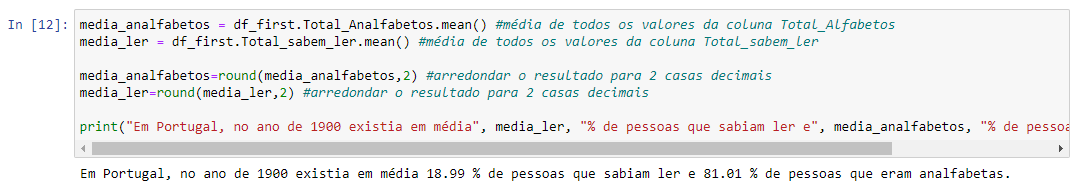

#### 1911

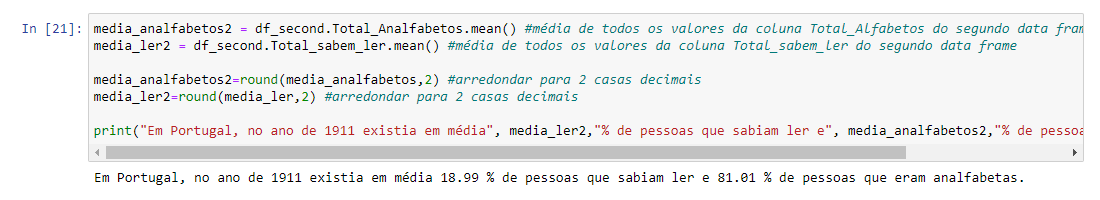

Assim concluímos os nossos estudos e acreditamos que este trabalho foi bastante esclarecedor na medida em que pudemos conhecer um pouco mais da sociedade antiga em Portugal. É bastante gratificante ver como evoluímos visto que, em 2021, é rara a pessoa que não saiba ler ou escrever e existe muitas mais opurtunidades de ensino a esse respeito. 